# Analyzing English Language

I gathered 370,099 english words as listed on https://github.com/dwyl/english-words.  First, we will analyze the frequencies of individual letters in the English language.  

In [52]:
# Import libraries
import numpy as np
from collections import Counter
import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
sns.reset_defaults()
sns.set_context("poster")
sns.set_style("darkgrid")

In [3]:
# Import dictionary of english words
f = open('english_words.txt', 'r').readlines()
print(len(f))

370099


In [5]:
# Random list of example words
print(np.random.choice(f, 10))

['overbrilliancy\n' 'ethnoses\n' 'intransient\n' 'halcyon\n' 'sish\n'
 'acritochromacy\n' 'whiskeys\n' 'dimetient\n' 'politicks\n' 'ulotrichi\n']


## Frequency of english letters

In [44]:
# Initialize counter
singleLetters = Counter()

In [45]:
# count letter occurances
for word in tqdm.tqdm(f):
    for letter in word:
        singleLetters[letter] += 1


100%|██████████| 370099/370099 [00:02<00:00, 177453.61it/s]


In [55]:
# remove new lines
del singleLetters['\n']
singleDict = dict(singleLetters)
print(list(singleDict.keys()))

['a', 'h', 'e', 'd', 'i', 'n', 'g', 's', 'l', 'm', 'r', 'v', 'k', 'w', 'o', 'f', 'c', 't', 'u', 'b', 'y', 'x', 'j', 'p', 'z', 'q']


In [57]:
# Normalize frequency
singleDictNormed = {}
for key in list(singleDict.keys()):
    singleDictNormed[key] = singleDict[key] / sum(singleLetters.values())

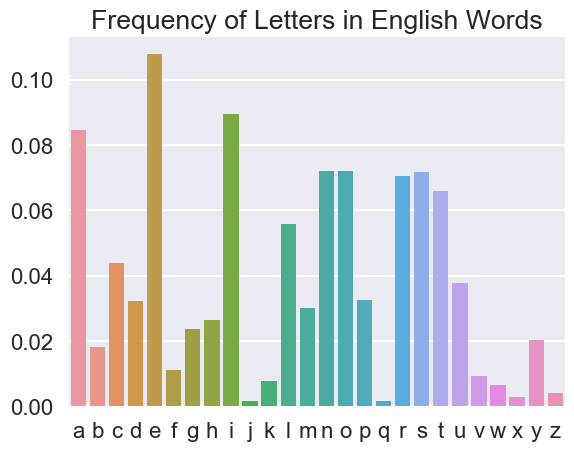

In [59]:
sns.barplot(x=list(singleDictNormed.keys()), y=list(singleDictNormed.values()), 
            order=sorted(singleDictNormed.keys()))
plt.title("Frequency of Letters in English Words")
plt.show()

In [61]:
# Save results
with open('letterFrequency.csv', 'w') as file:
    [file.write('{0},{1}\n'.format(key, value)) for key, value in singleDictNormed.items()]


## Frequency of 2 letter sequences

In [73]:
# Set up counter
pairLetters = Counter()
# Count two letter sequences
for word in tqdm.tqdm(f):
    strLength = len(word)
    i = 0
    while i < strLength - 1:
        letter0, letter1 = word[i], word[i+1]
        pairLetters[(letter0, letter1)] += 1
        i += 1


100%|██████████| 370099/370099 [00:03<00:00, 92717.18it/s] 


In [87]:
# Ensure every possible pair is accounted for
extra = list(singleDict.keys())
extra.append('\n')
    
for letter0 in list(singleDict.keys()):
    for letter1 in extra:
        pairLetters[(letter0, letter1)] += 0

In [83]:
pairNormedDict = {}
for (letter0, letter1) in list(pairLetters.keys()):
    pairNormedDict[(letter0, letter1)] = pairLetters[(letter0, letter1)] / sum(pairLetters.values())

In [84]:
pairNormedDict

{('a', '\n'): 0.004685134790981695,
 ('a', 'a'): 7.296826309780322e-05,
 ('a', 'b'): 0.003787768229904397,
 ('a', 'c'): 0.005157282375732187,
 ('a', 'd'): 0.002748471243350588,
 ('a', 'e'): 0.0017543859649122807,
 ('a', 'f'): 0.0006143641602783668,
 ('a', 'g'): 0.002445152188904818,
 ('a', 'h'): 0.0004149175744777046,
 ('a', 'i'): 0.0018851565383855987,
 ('a', 'j'): 9.099571633373108e-05,
 ('a', 'k'): 0.0008736161068140911,
 ('a', 'l'): 0.011605959933269808,
 ('a', 'm'): 0.0032764180881170468,
 ('a', 'n'): 0.011458020356714654,
 ('a', 'o'): 0.00011131236998057041,
 ('a', 'p'): 0.0030223168425058734,
 ('a', 'q'): 9.757716751510157e-05,
 ('a', 'r'): 0.009086408731010368,
 ('a', 's'): 0.004760678404541773,
 ('a', 't'): 0.012034612710212982,
 ('a', 'u'): 0.0015615208302929891,
 ('a', 'v'): 0.0010000944295169502,
 ('a', 'w'): 0.0005585649002623996,
 ('a', 'x'): 0.0003679889660540194,
 ('a', 'y'): 0.0007471377841112323,
 ('a', 'z'): 0.000421785175710439,
 ('b', '\n'): 0.00018256373277019002,

In [85]:
# Save results
with open('pairFrequency.csv', 'w') as file:
    [file.write('{0},{1}\n'.format(key, value)) for key, value in pairNormedDict.items()]

In [100]:
# Convert to 2D array
pairArray = []

for i, letter0 in enumerate(list(singleDict.keys())):
    pairArray.append([])
    for j, letter1 in enumerate(extra):
        pairArray[i].append(-1*np.log10(pairNormedDict[(letter0, letter1)] + 10**(-8)))
        

In [102]:
# Convert 2D array to Pandas
cols = extra
ind = list(singleDict.keys())
pairDf = pd.DataFrame(pairArray, index=ind, columns=cols)

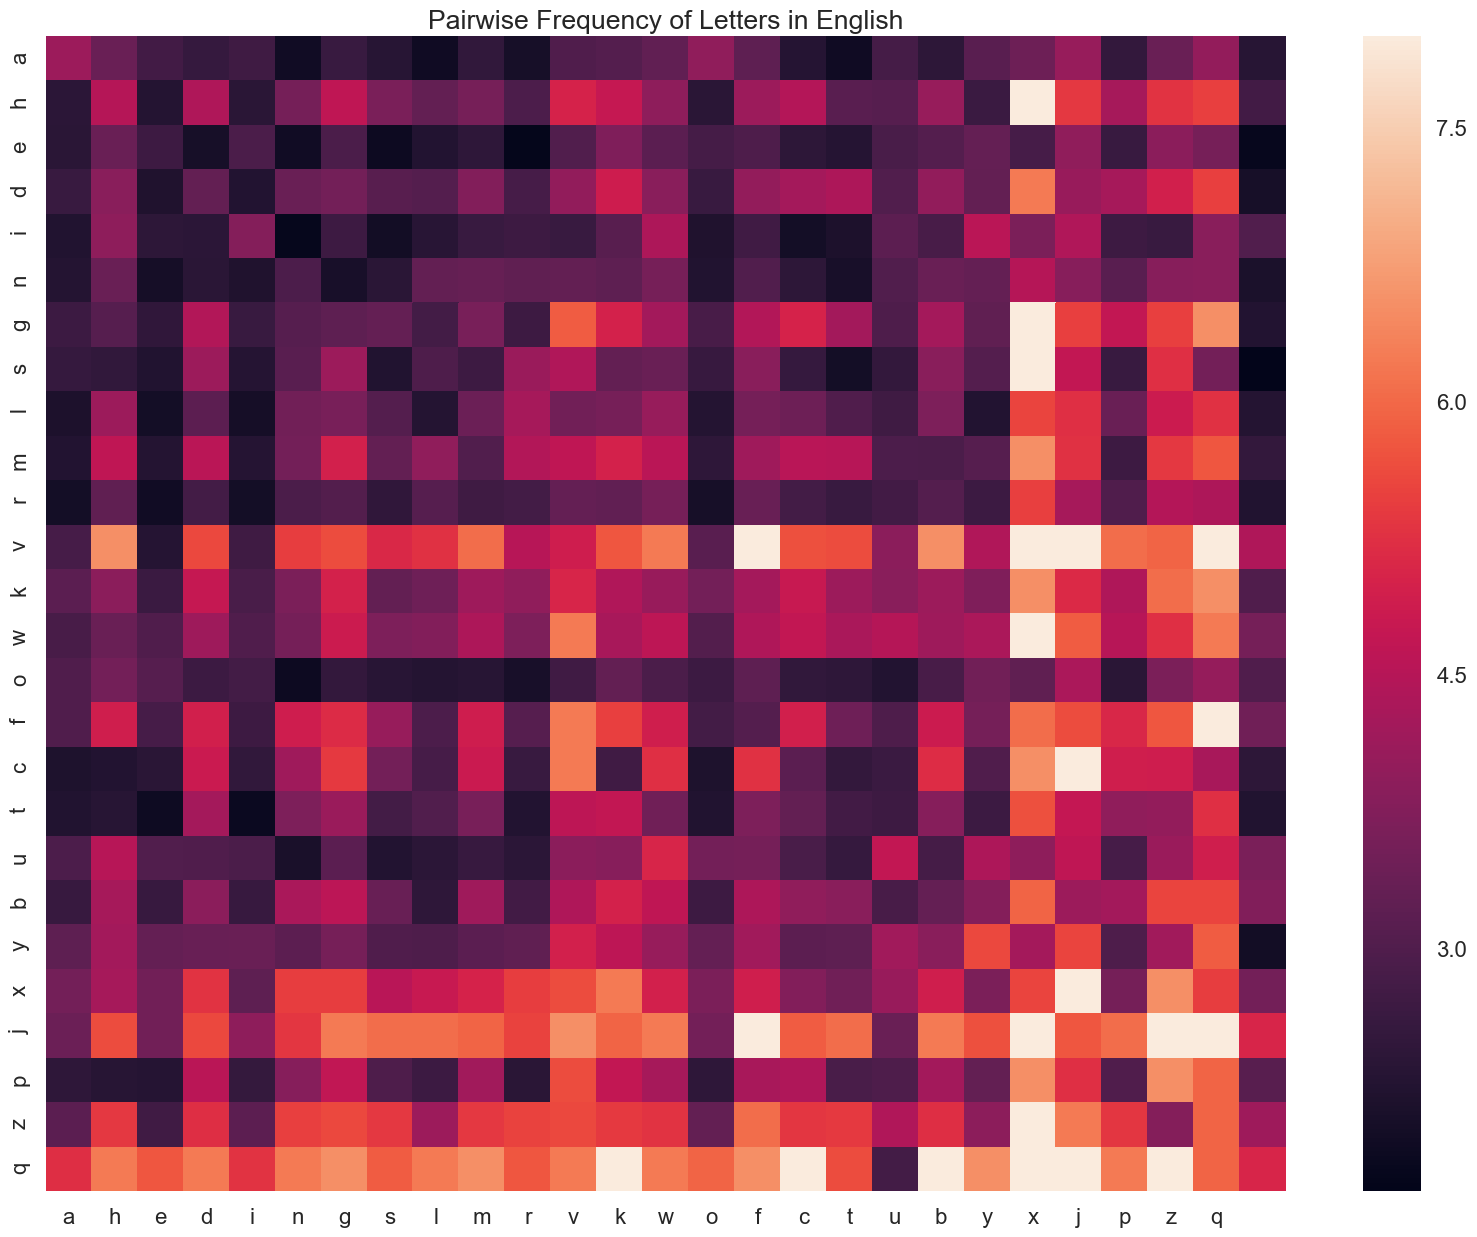

In [112]:
fig, ax = plt.subplots(figsize=(20, 15))

sns.heatmap(pairDf)
plt.title("Pairwise Frequency of Letters in English")
plt.show()

In [113]:
pairLetters.most_common(10)

[(('s', '\n'), 75666),
 (('e', 'r'), 66713),
 (('i', 'n'), 60886),
 (('e', '\n'), 56959),
 (('t', 'i'), 49645),
 (('o', 'n'), 47067),
 (('e', 's'), 46930),
 (('t', 'e'), 44229),
 (('a', 't'), 42057),
 (('a', 'l'), 40559)]